### Student Information
Name: 林柏辰

Student ID: 110061530

GitHub ID: Pochenlin513

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

### Begin Assignment Here

## Part1 Take home exercises

In [1]:
%load_ext autoreload
%autoreload 2
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [2]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

text  category
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3
80  From: annick@cortex.physiol.su.oz.au (Annick A...         2
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...         0

In [3]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
70    From: weaver@chdasic.sps.mot.com (Dave Weaver)...
80    From: annick@cortex.physiol.su.oz.au (Annick A...
90    Subject: Vonnegut/atheism From: dmn@kepler.unh...
Name: text, dtype: object

In [4]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2   
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3   
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1   
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0   
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
80  From: annick@cortex.physiol.su.oz.au (Annick A...         2   
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...         0   

             category_name  
0            comp.graphics  
10  soc.religion.christian  
20  soc.religion.christian  
30                 sci.med  
40  soc.religion.christian  
50           comp.graphics  
60             alt.atheism  
70  soc.religion.christian  
80                 sci.med  
90             alt.atheism

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
#select via integer list
X.iloc[[10,20,30,50,80,130,210], [0,2]]

text           category_name
10   From: anasaz!karl@anasazi.com (Karl Dussik) Su...  soc.religion.christian
20   From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...  soc.religion.christian
30   From: vgwlu@dunsell.calgary.chevron.com (greg ...                 sci.med
50   From: ab@nova.cc.purdue.edu (Allen B) Subject:...           comp.graphics
80   From: annick@cortex.physiol.su.oz.au (Annick A...                 sci.med
130  From: edm@twisto.compaq.com (Ed McCreary) Subj...             alt.atheism
210  From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...             alt.atheism

In [6]:
#select via callable
X.loc[::10, lambda df:['text', 'category_name']][:10]

text           category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...  soc.religion.christian
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...  soc.religion.christian
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...                 sci.med
40  From: david-s@hsr.no (David A. Sjoen) Subject:...  soc.religion.christian
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...           comp.graphics
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...             alt.atheism
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...  soc.religion.christian
80  From: annick@cortex.physiol.su.oz.au (Annick A...                 sci.med
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...             alt.atheism

### ** >>> End Exercise 2 (take home):** 

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

The three Falses appear at 'NaN', 'None', and ''.  The first two result is reasonable because they are valid strings with their content being 'NaN' and 'None'.  And the last one, the empty sting, is showing False because **None** is an object in python.  '' is an empty string so it is not **None** type.

### >>> ** End Exercise 5 (take home)** 

In [9]:
X_sample = X.sample(n=1000) #random state

In [10]:
len(X_sample)

1000

In [11]:
X_sample[0:4]

text  category  \
207   From: patrick@Erc.MsState.Edu (Patrick Bridges...         1   
1229  From: jgreen@amber (Joe Green) Subject: Re: We...         1   
412   From: pinky@tamu.edu (The Man behind The Curta...         1   
559   From: edb9140@tamsun.tamu.edu (E.B.) Subject: ...         1   

      category_name  
207   comp.graphics  
1229  comp.graphics  
412   comp.graphics  
559   comp.graphics

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [12]:
# Answer here
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian

The index of X_sample 467, 1031, 1246, 307, ... are not sorted.  The sample function does not sort the index to make the data in the same order as the previous `X`.  So if the order of data is meaningful for later actions, we should sort them after the sampling process

### >>> End Exercise 6 (take home):

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


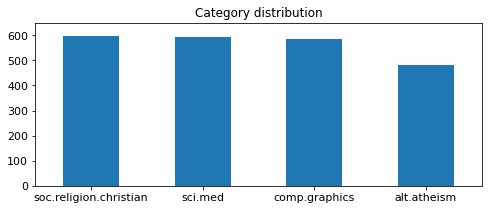

In [15]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

soc.religion.christian    278
sci.med                   269
comp.graphics             238
alt.atheism               215
Name: category_name, dtype: int64


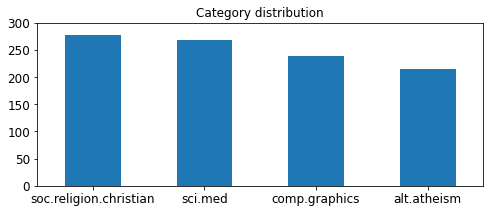

In [16]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

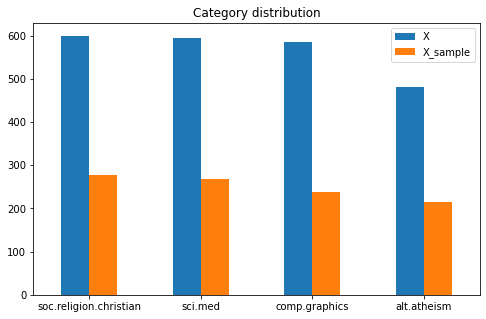

In [17]:
side_by_side = pd.DataFrame({'X': X.category_name.value_counts().values,
                             'X_sample': X_sample.category_name.value_counts().reindex_like(X.category_name.value_counts()).values},
                            index = ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'])
side_by_side.plot.bar(title = 'Category distribution',
                      figsize=(8,5),
                      rot=0)

### >>> End Exercise 8 (take home):

In [18]:
import nltk

In [19]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
X_counts = count_vect.fit_transform(X.text)

In [21]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

In [22]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [23]:
X_count5 = X_counts[4, 0:100].toarray()
idx = np.where(X_count5==1)

In [24]:
# The index of where the second 1 appears
idx[1]

array([ 0, 37], dtype=int64)

In [25]:
# Get what it represent from the vocabulary
count_vect.get_feature_names()[idx[1][1]]

'01'

The `1` at index 37 of the fifth record represents the `01` term

### **>>> End Exercise 10 (take home):**

In [26]:
import seaborn as sns

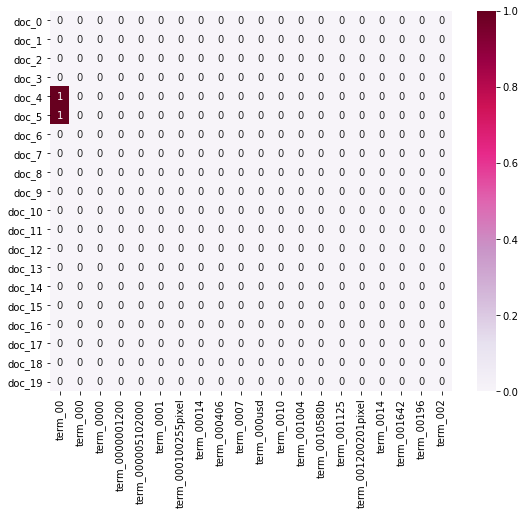

In [27]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

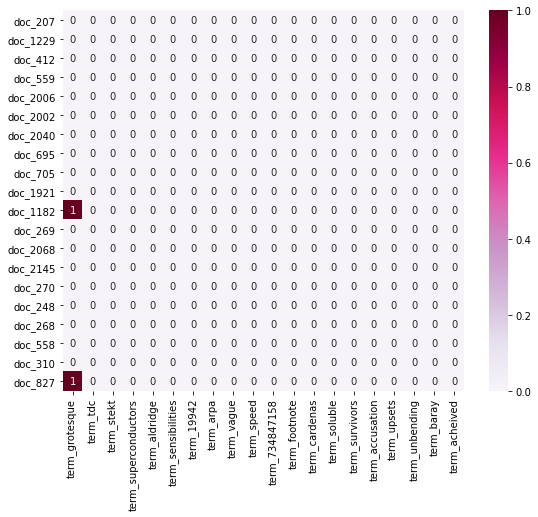

In [28]:
from random import sample
plot_x = ["term_"+str(i) for i in sample(count_vect.get_feature_names(), 20)]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)[0:20]]
X_sample_counts = count_vect.transform(X_sample.text)
plot_z = X_sample_counts[0:20, 0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Because the there is a lot of words, I just randomly sample 20 words and also use the sampled text data to derive the histogram

### **>>> End Exercise 11 (take home):** 

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [29]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']


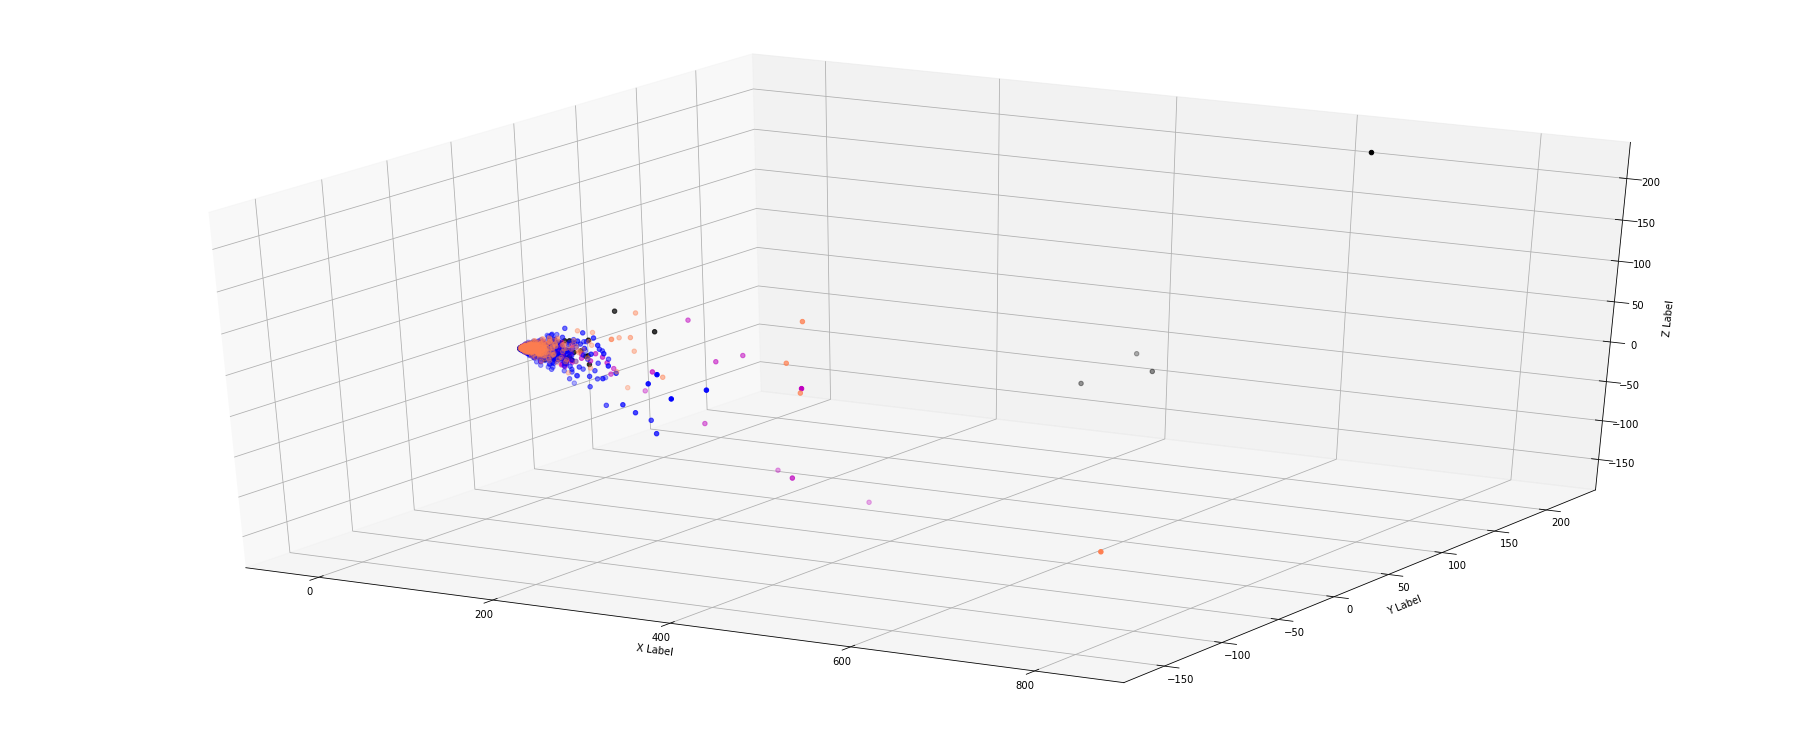

In [30]:

# plot
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### >>> End Exercise 12 (take home):

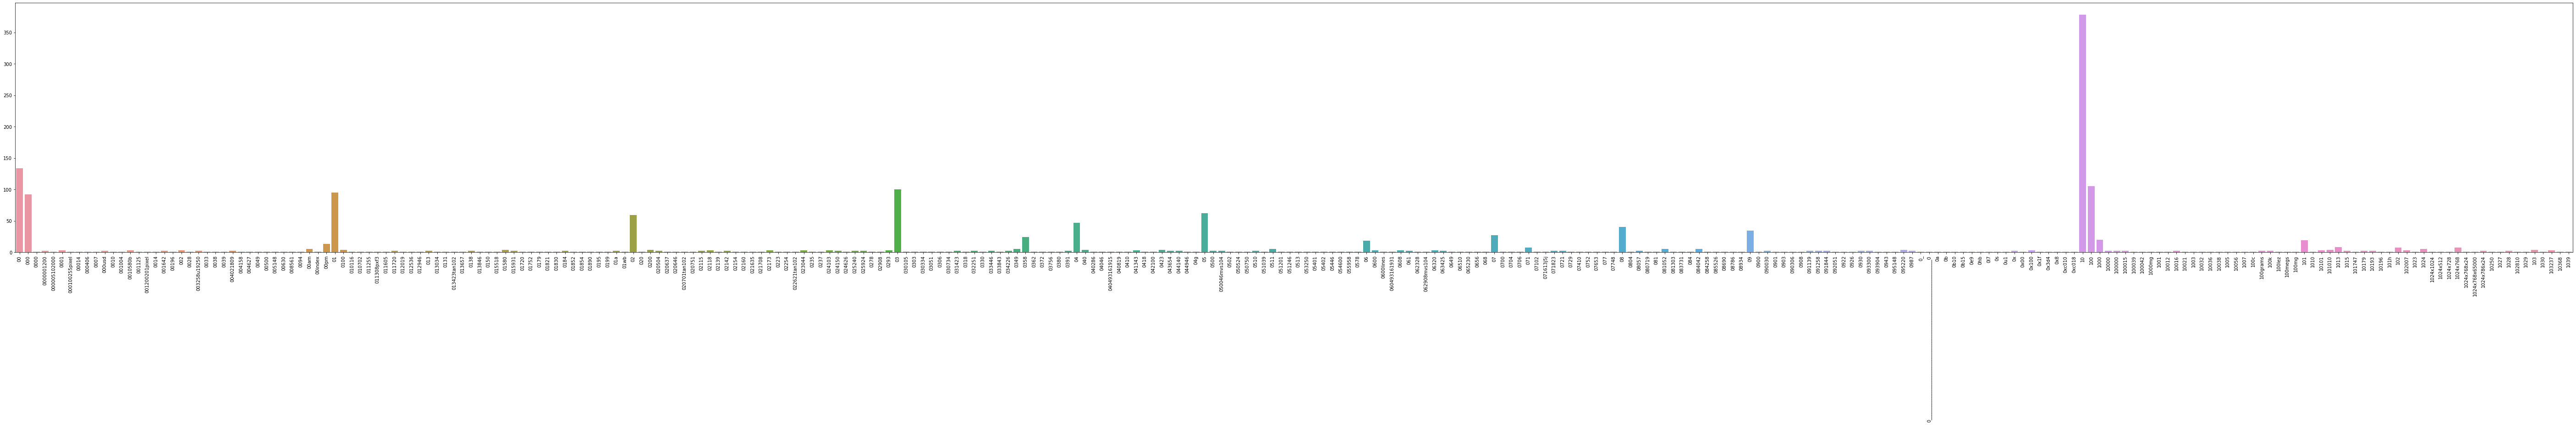

In [31]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
#term_frequencies = []
#for j in range(0,X_counts.shape[1]):
    #term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [32]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
                x=count_vect.get_feature_names()[:300],
                y=term_frequencies[:300],
                orientation='v'))
fig.show()

### >>> ** End Exercise 13 (take home):**

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [33]:
idx = term_frequencies>1500
fig = go.Figure(go.Bar(
                x=np.array(count_vect.get_feature_names())[idx],
                y=term_frequencies[idx],
                orientation='v'))
fig.show()

Set a threshold of frequency can see what are the most frequently used words.  Here the threshold is `1500` and the number of words becomes `77`.  

### >>> ** End Exercise 14 (take home):** 

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [34]:
idx = list(reversed(np.argsort(term_frequencies)[-300:]))

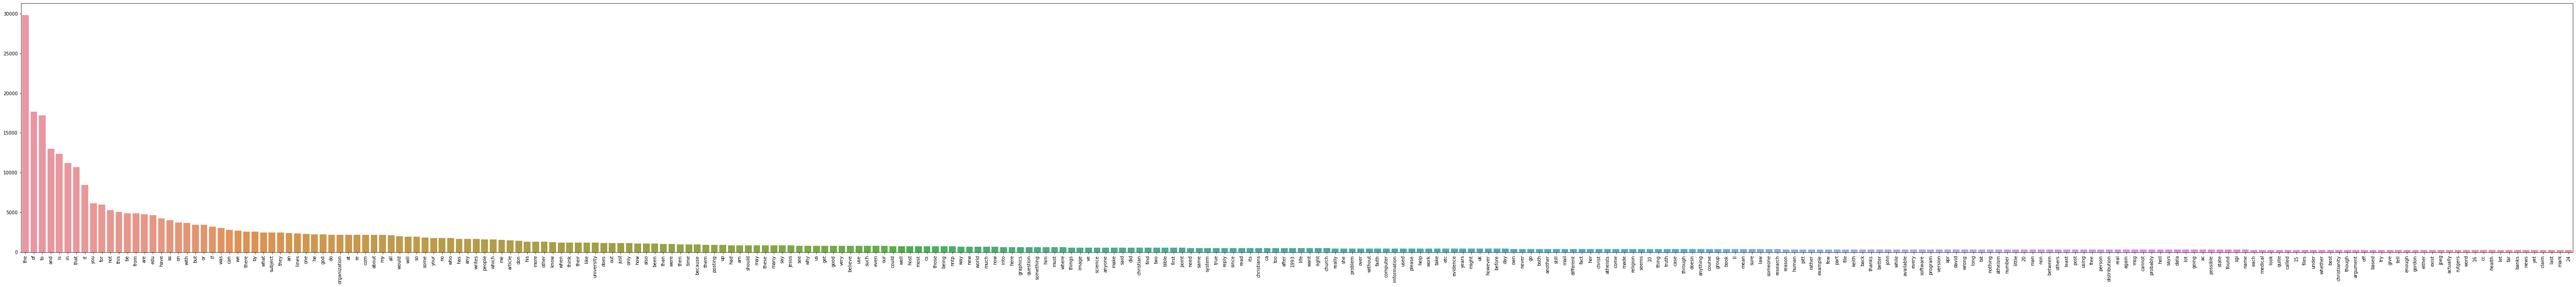

In [35]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=np.array(count_vect.get_feature_names())[idx], 
            y=term_frequencies[idx])
g.set_xticklabels(np.array(count_vect.get_feature_names())[idx], rotation = 90);

Use `np.argsort` to sort the term_frequency by frequency. Then take the top 300 terms with highest frequency to plot.  Obviously a long tail is observed.  

### >>> ** End Exercise 15 (take home):** 

In [36]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

In [37]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [38]:
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(X.category_name)

LabelBinarizer()

In [39]:
X['bin_category_name'] = mlb2.transform(X['category_name']).tolist()

In [40]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category bin_category_name  
0  [0, 1, 0, 0]      [0, 1, 0, 0]  
1  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  [0, 0, 0, 1]      [0, 0, 0, 1]  
7  [0, 0, 1, 0]      [0, 0, 1, 0]  
8  [0, 0, 1, 0]      [0, 0, 1, 0]

The `LabelBinarizer` also works on `category_name` column

### >>> ** End Exercise 16 (take home):**

## Part II perform on new dataset

### Load data

In [41]:
folder = './sentiment labelled sentences/'
files = [folder + 'amazon_cells_labelled.txt', folder + 'imdb_labelled.txt', folder + 'yelp_labelled.txt']

In [42]:
text_data = []
for file in files:
    with open(file, 'r', encoding="utf-8") as f:
        for line in f.readlines():
            line = line.split('\n')
            text_data.append(line[0].split('\t'))

In [43]:
len(text_data)

3000

In [44]:
text_df = pd.DataFrame(text_data, columns=['sentence', 'score'])

### See how our dataset look like

In [45]:
text_df.head(10)

sentence score
0  So there is no way for me to plug it in here i...     0
1                        Good case, Excellent value.     1
2                             Great for the jawbone.     1
3  Tied to charger for conversations lasting more...     0
4                                  The mic is great.     1
5  I have to jiggle the plug to get it to line up...     0
6  If you have several dozen or several hundred c...     0
7        If you are Razr owner...you must have this!     1
8                Needless to say, I wasted my money.     0
9                   What a waste of money and time!.     0

In [46]:
# Add one column representing what the score means
text_df['score_name'] = text_df.score.apply(lambda x: 'positive' if x=='1' else 'negative')

In [47]:
text_df[:10]

sentence score score_name
0  So there is no way for me to plug it in here i...     0   negative
1                        Good case, Excellent value.     1   positive
2                             Great for the jawbone.     1   positive
3  Tied to charger for conversations lasting more...     0   negative
4                                  The mic is great.     1   positive
5  I have to jiggle the plug to get it to line up...     0   negative
6  If you have several dozen or several hundred c...     0   negative
7        If you are Razr owner...you must have this!     1   positive
8                Needless to say, I wasted my money.     0   negative
9                   What a waste of money and time!.     0   negative

In [48]:
# do some query
text_df[:10][['sentence', 'score_name']]

sentence score_name
0  So there is no way for me to plug it in here i...   negative
1                        Good case, Excellent value.   positive
2                             Great for the jawbone.   positive
3  Tied to charger for conversations lasting more...   negative
4                                  The mic is great.   positive
5  I have to jiggle the plug to get it to line up...   negative
6  If you have several dozen or several hundred c...   negative
7        If you are Razr owner...you must have this!   positive
8                Needless to say, I wasted my money.   negative
9                   What a waste of money and time!.   negative

In [49]:
# fetch records belonging to the `positive` category
text_df.loc[lambda f: f.score_name=='positive'].loc[::10][:5]

sentence score score_name
1                         Good case, Excellent value.     1   positive
21  I bought this to use with my Kindle Fire and a...     1   positive
44                       Excellent bluetooth headset.     1   positive
61  I really recommend this faceplates since it lo...     1   positive
78  I love this phone , It is very handy and has a...     1   positive

### Check missing value
pandas.DataFrame has built-in funciton to check null values.  So I just use it instead of moditying the code in helper

In [50]:
# Check missing value by column
text_df.isnull().sum()

sentence      0
score         0
score_name    0
dtype: int64

In [51]:
# Check missing value by row
text_df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Length: 3000, dtype: int64

In [52]:
len(text_df)

3000

### Check duplicates

In [53]:
# Check if duplicated data
text_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [54]:
sum(text_df.duplicated())

17

Find some duplicates.  Check waht they look like

In [55]:
text_df[text_df.duplicated(keep=False)]

sentence score score_name
18                                        Works great!.     1   positive
179   If you like a loud buzzing to override all you...     0   negative
180                             Don't buy this product.     0   negative
187                                       Great phone!.     1   positive
262                                        Works great.     1   positive
285                                       Great phone!.     1   positive
290                                        Great Phone.     1   positive
392                               This is a great deal.     1   positive
402                    Excellent product for the price.     1   positive
407                                        Works great.     1   positive
446                                       Does not fit.     0   negative
524                                       Works great!.     1   positive
543                             Don't buy this product.     0   negative
647                                        Great phone.     1   positive
744   If you like a loud buzzing to override all you...     0   negative
748                                       Does not fit.     0   negative
778                               This is a great deal.     1   positive
792                                        Great Phone.     1   positive
892                    Excellent product for the price.     1   positive
896                                        Great phone.     1   positive
1090                   Definitely worth checking out.       1   positive
1125                                            10/10       1   positive
1363                   Definitely worth checking out.       1   positive
1572                                 Not recommended.       0   negative
1585                                 Not recommended.       0   negative
1788                                            10/10       1   positive
2334                                 I love this place.     1   positive
2380                                   I won't be back.     0   negative
2383                             The food was terrible.     0   negative
2505                  I would not recommend this place.     0   negative
2814                                 I love this place.     1   positive
2816                             The food was terrible.     0   negative
2843                                   I won't be back.     0   negative
2846                  I would not recommend this place.     0   negative

In [56]:
# Drop duplicate data
text_df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [57]:
len(text_df)

2966

### Sampling

In [58]:
text_sample_df = text_df.sample(n=1000)
len(text_sample_df)

1000

In [59]:
text_sample_df[:4]

sentence score score_name
2180  The burger had absolutely no flavor - the meat...     0   negative
2370  I left with a stomach ache and felt sick the r...     0   negative
879   It seems completely secure, both holding on to...     1   positive
1766                               And it was boring.       0   negative

### See value counts of `score_name`

In [60]:
text_df.score_name.value_counts()

negative    1486
positive    1480
Name: score_name, dtype: int64

In [61]:
text_sample_df.score_name.value_counts().reindex_like(text_df.score_name.value_counts())

negative    478
positive    522
Name: score_name, dtype: int64

### Plot side-by-side comparison

Here is a little different.  The index of `text_df` is 'negative' and then 'positive', but `text_sample` is not. So us`reindex_like` to align the index.

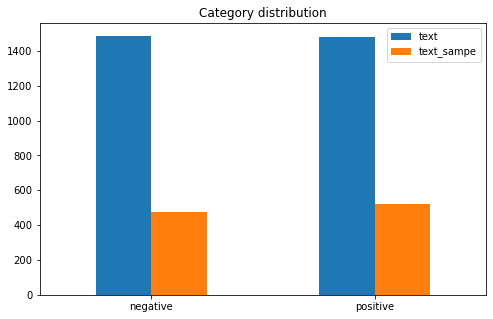

In [62]:
side_by_side = pd.DataFrame({'text': text_df.score_name.value_counts().values,
                             'text_sampe': text_sample_df.score_name.value_counts().reindex_like(text_df.score_name.value_counts()).values},
                            index = text_df.score_name.value_counts().index)
side_by_side.plot.bar(title = 'Category distribution',
                      figsize=(8,5),
                      rot=0)

### Feature creation

In [63]:
text_df['unigrams'] = text_df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [64]:
text_df[:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [65]:
cv = CountVectorizer()
text_counts = cv.fit_transform(text_df.sentence)

In [66]:
text_counts.shape

(2966, 5153)

In [67]:
cv.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [68]:
text_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

There is a `1` appearing in the 4th record.  See what it represent.

In [69]:
text_count5 = text_counts[3, 0:100].toarray()
idx = np.where(text_count5==1)

In [70]:
idx

(array([0], dtype=int64), array([45], dtype=int64))

In [71]:
cv.get_feature_names()[45]

'45'

It represents `45` exactly

Draw heat map

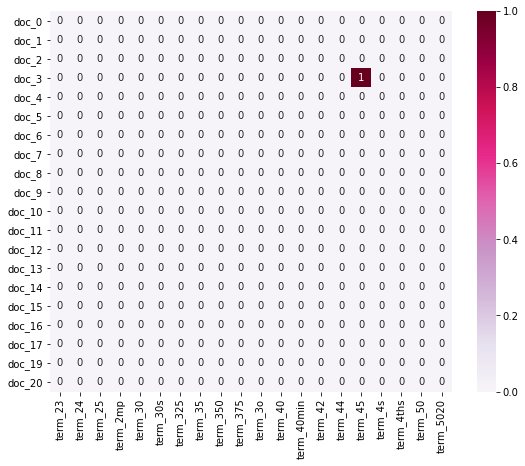

In [72]:
plot_x = ["term_"+str(i) for i in cv.get_feature_names()[30:50]]
plot_y = ["doc_"+ str(i) for i in list(text_df.index)[0:20]]
plot_z = text_counts[0:20, 30:50].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimension reduction

Use PCA to find 2 principle components

In [73]:
text_reduced = PCA(n_components = 2).fit_transform(text_counts.toarray())
text_reduced.shape

(2966, 2)

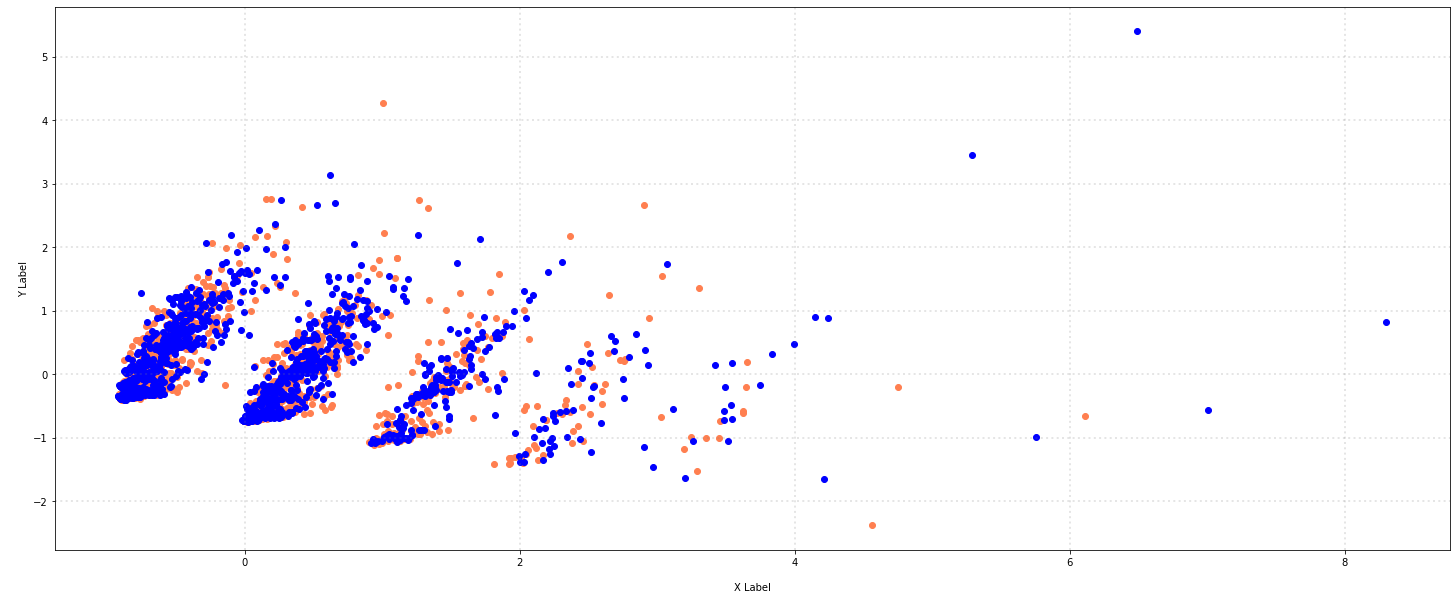

In [74]:
categories = ['negative', 'positive']
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = text_reduced[text_df['score_name'] == category].T[0]
    ys = text_reduced[text_df['score_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Use PCA to find 2 principle components

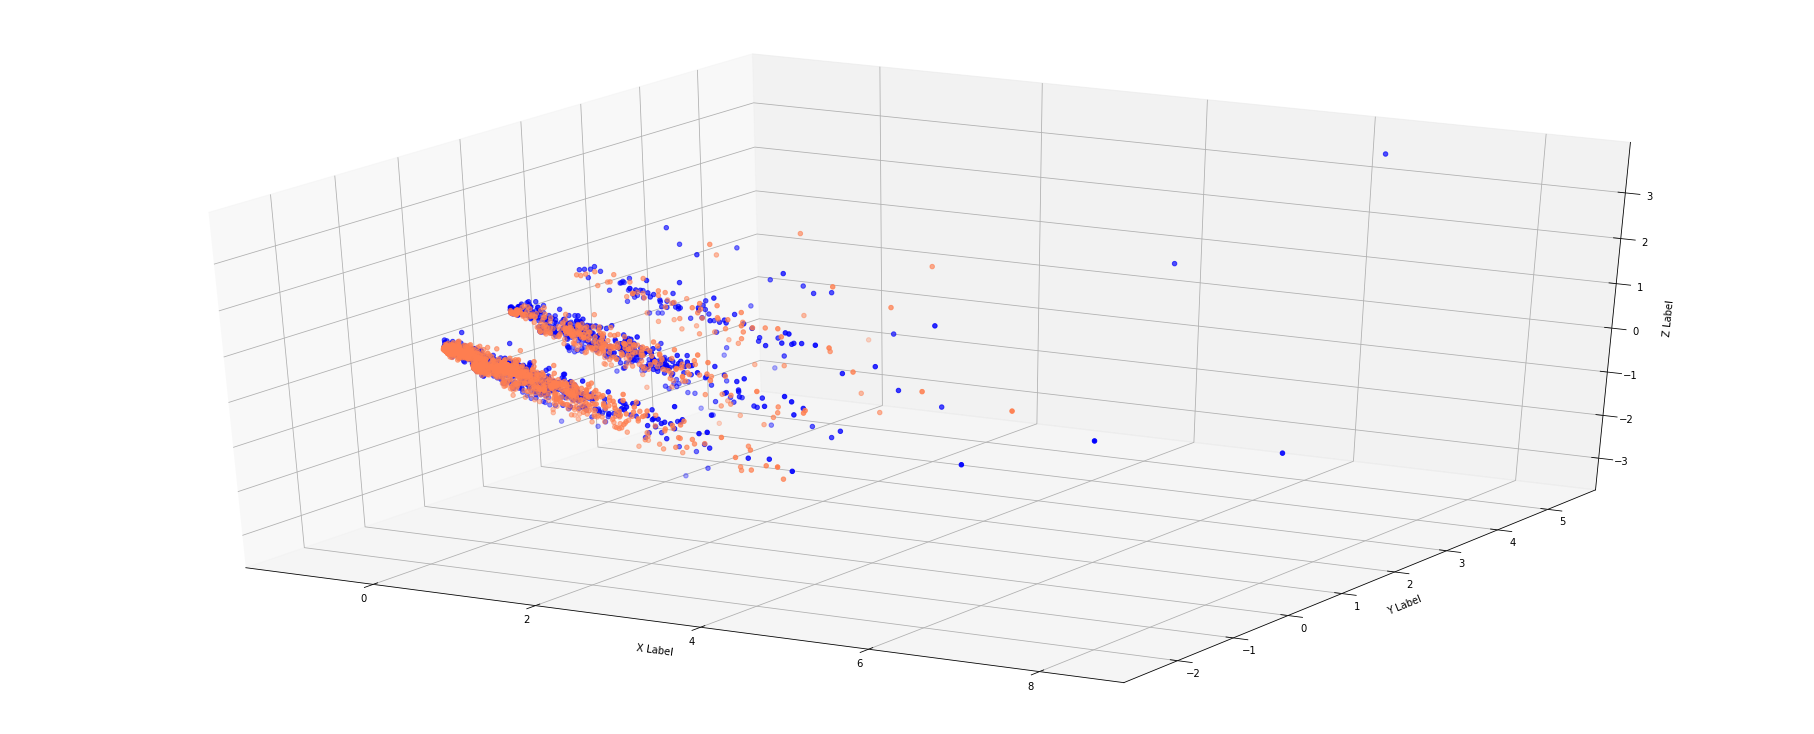

In [75]:
text_reduced = PCA(n_components = 3).fit_transform(text_counts.toarray())
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = text_reduced[text_df['score_name'] == category].T[0]
    ys = text_reduced[text_df['score_name'] == category].T[1]
    zs = text_reduced[text_df['score_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### Attribute transformation / aggregation

Calculate term frequency

In [76]:
term_frequencies = np.asarray(text_counts.sum(axis=0))[0]

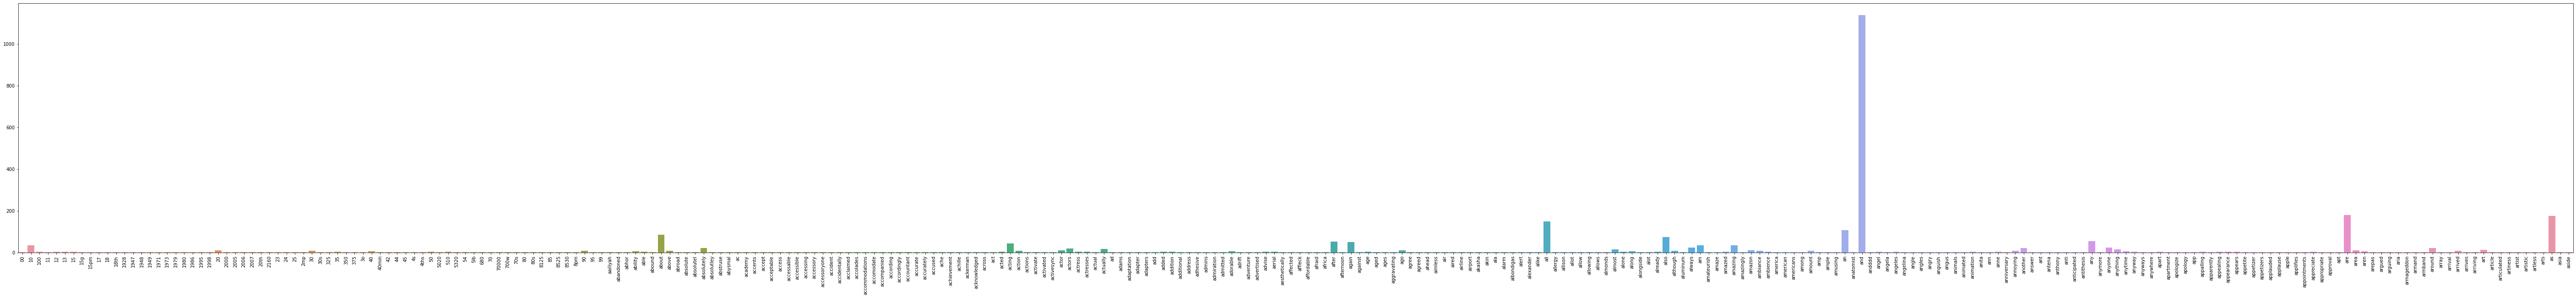

In [77]:
# by seaborn
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=cv.get_feature_names()[:300], 
                y=term_frequencies[:300])
g.set_xticklabels(cv.get_feature_names()[:300], rotation = 90);

In [78]:
# by plotly
fig = go.Figure(go.Bar(
                x=cv.get_feature_names()[:300],
                y=term_frequencies[:300],
                orientation='v'))
fig.show()

In [79]:
# Plot those with frequency higher then 100, there are 47 terms left
idx = term_frequencies>100
fig = go.Figure(go.Bar(
                x=np.array(cv.get_feature_names())[idx],
                y=term_frequencies[idx],
                orientation='v'))
fig.show()

Also, we can see the long in this dataset

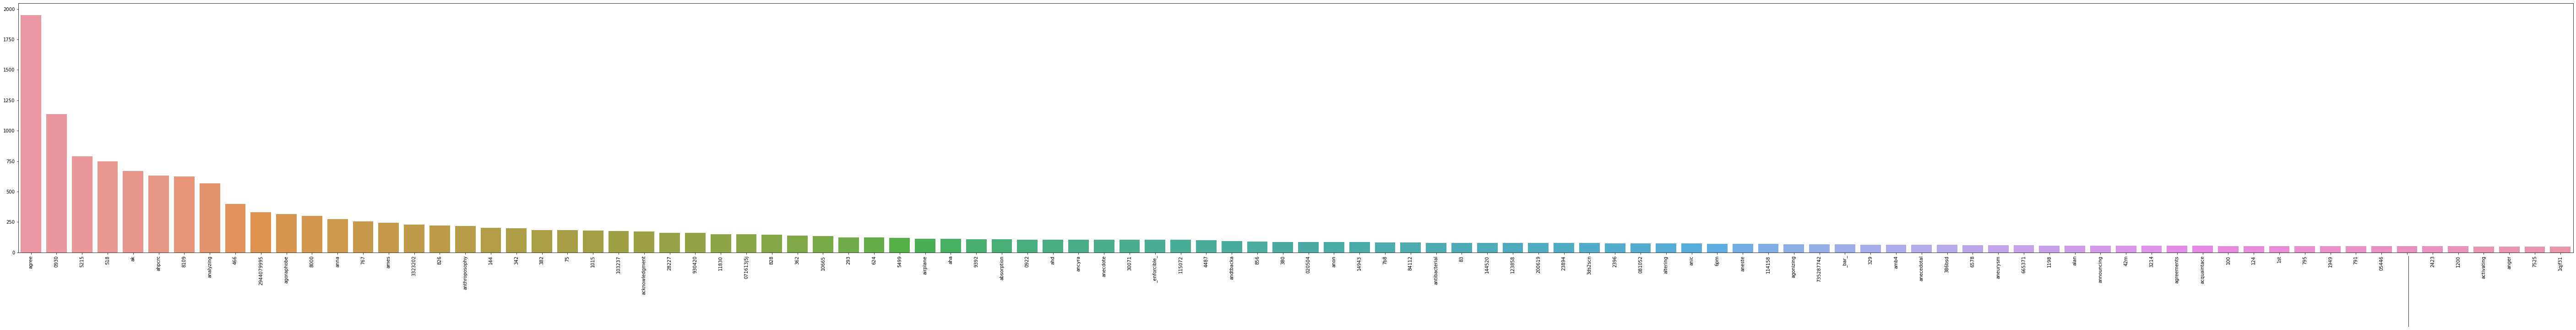

In [80]:
idx = list(reversed(np.argsort(term_frequencies)[-100:]))
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=np.array(cv.get_feature_names())[idx], 
                y=term_frequencies[idx])
g.set_xticklabels(np.array(count_vect.get_feature_names())[idx], rotation = 90);

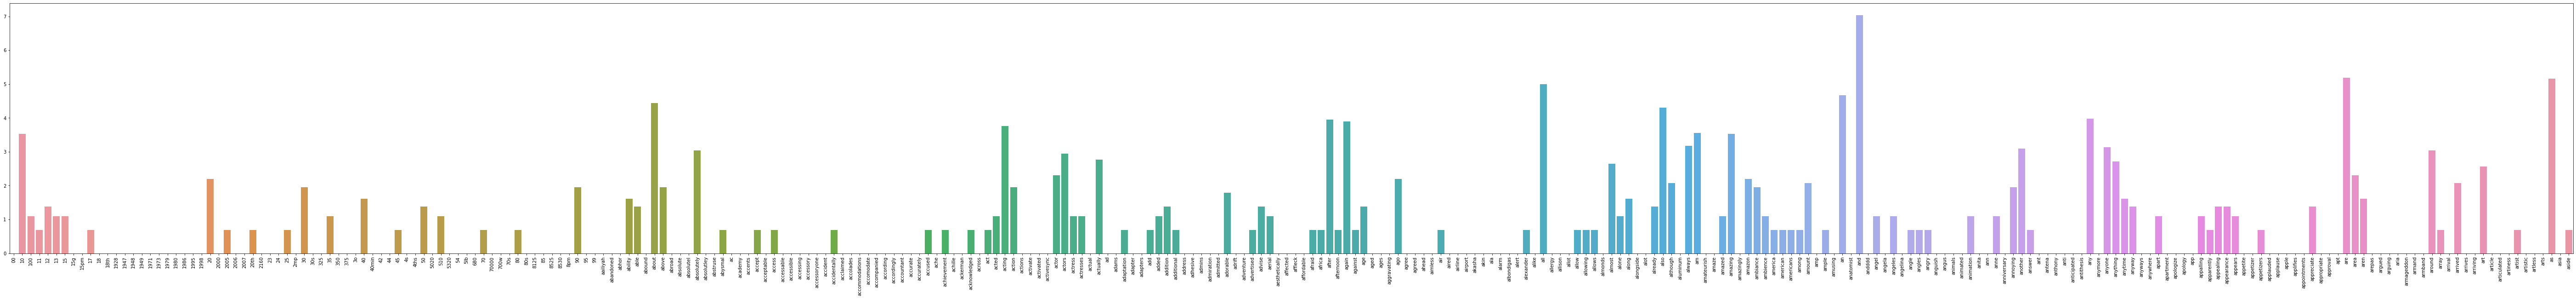

In [81]:
# Plot log(frequency)
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=cv.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(cv.get_feature_names()[:300], rotation = 90);

### Discretization and Binarization

Do binarization on `score` column only has `0` and `1`, which is already binarized, we can do binarization on `score_name`, which represents **positive** and **negative**.

In [82]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(text_df.score_name)

LabelBinarizer()

In [83]:
mlb.classes_

array(['negative', 'positive'], dtype='<U8')

In [84]:
text_df['bin_score_name'] = mlb.transform(text_df.score_name).tolist()
text_df

sentence score score_name  \
0     So there is no way for me to plug it in here i...     0   negative   
1                           Good case, Excellent value.     1   positive   
2                                Great for the jawbone.     1   positive   
3     Tied to charger for conversations lasting more...     0   negative   
4                                     The mic is great.     1   positive   
...                                                 ...   ...        ...   
2995  I think food should have flavor and texture an...     0   negative   
2996                           Appetite instantly gone.     0   negative   
2997  Overall I was not impressed and would not go b...     0   negative   
2998  The whole experience was underwhelming, and I ...     0   negative   
2999  Then, as if I hadn't wasted enough of my life ...     0   negative   

                                               unigrams bin_score_name  
0     [So, there, is, no, way, for, me, to, plug, it...            [0]  
1                  [Good, case, ,, Excellent, value, .]            [1]  
2                         [Great, for, the, jawbone, .]            [1]  
3     [Tied, to, charger, for, conversations, lastin...            [0]  
4                              [The, mic, is, great, .]            [1]  
...                                                 ...            ...  
2995  [I, think, food, should, have, flavor, and, te...            [0]  
2996                     [Appetite, instantly, gone, .]            [0]  
2997  [Overall, I, was, not, impressed, and, would, ...            [0]  
2998  [The, whole, experience, was, underwhelming, ,...            [0]  
2999  [Then, ,, as, if, I, had, n't, wasted, enough,...            [0]  

[2966 rows x 5 columns]

We can see that the binarized score name is exactly the same as score

### Data exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [85]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = text_df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = text_df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = text_df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [86]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = cv.transform(document_to_transform_1)
document_vector_count_2 = cv.transform(document_to_transform_2)
document_vector_count_3 = cv.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [87]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


The cosine simularity between a sentence and itself is 1 as expected.  And it seems like these three data has no common feature.

## Part III Visualization, TF-IDF, and Naive Bayes Classifier

### To decide how to set n_component, we plot the accumulated expained variance ratio

In [88]:
text_counts.toarray().shape

(2966, 5153)

There are 5153 terms in the beginning.  Let's see using how many PCA components we can roughly explain the terms.  

In [89]:
pca = PCA()
pca.fit(text_counts.toarray())

PCA()

Plot cumulative explained variance ratio to see how many components can reach high enough explained variance

In [90]:
cumulated_exp_var_ratio = np.cumsum(pca.explained_variance_ratio_)

In [91]:
fig = go.Figure(go.Bar(
                x=np.arange(300),
                y=cumulated_exp_var_ratio,
                orientation='v'))
fig.show()

We see that about 250 components can explain over 70% variance of the total 5153 terms.  Although it still seems too many, but we have significantly reduced the feature dimention.

Also, the cumulative explained variance ratio grows like `log`, so maybe 70% explained variance is acceptable or too many components are needed to reach higher ratio. 

### Perform TF-IDF

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(text_df.sentence)

In [93]:
text_tfidf.toarray().shape

(2966, 5153)

### Naive Bayes Classifier

Create TF(term frequency) and TF-IDF(term frequency-inverse document frequency) data

In [108]:
text_len = np.sum(text_counts.toarray(), axis=1)

X_term_counts = text_counts.toarray()
X_freq = []
for i in range(len(text_len)):
    X_freq.append(X_term_counts[i]/text_len[i])
X_freq = np.vstack(X_freq) # word frequency

X_tfidf = text_tfidf.toarray() # TF-IDF
y = text_df.score.values

Build Naive Bayes Classifier

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

X_freq_train, X_freq_test, y_train, y_test = train_test_split(X_freq, y, test_size=0.2, random_state=42)
bnb_freq = BernoulliNB(binarize=0.0)
bnb_freq.fit(X_freq_train, y_train)
print("Using word frequency")
bnb_freq.score(X_freq_test, y_test)

Using word frequency


0.8131313131313131

In [115]:
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
bnb_tfidf = BernoulliNB(binarize=0.0)
bnb_tfidf.fit(X_tfidf_train, y_train)
print("Using TF-IDF")
bnb_tfidf.score(X_tfidf_test, y_test)

Using TF-IDF


0.8131313131313131

We can see the result is the same.  I think it is because the text data are only short sentences (many lower than 10 words, the longest is 73) and the prediction result only depends on the appearance of some specific words but not their frequencies.  Thus the IDF modification barely change the result.

## Part IV

In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

1. Check null values:
    `pandas.Dataframe` has its own function to check the missing value counts for column/row: `pandas.Dataframe.isnull().sum()`.  So there is no need to write helper.
    
2. PCA on the data:
    From the cumulative explained variance figure I plot, I think if we want to explain the features well, so it is inefficient to do PCA.  Even without PCA, the accuracy still can reach 0.81 and does not take long time.